# Data Exploration
## Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_orl = pd.read_csv("data/parameter_igt_orl.csv")
df_orl["subjID_label"] = df_orl["subjID"].astype("category").cat.codes # number label for old/young
df_orl.head()

,subjID,A+,A-,K,BetaF,BetaP,A+-A-,subjID_label
0,old,0.324444,0.068862,1.502130,2.523191,-5.547480,0.255581,0
1,old,0.885744,0.120145,0.012591,3.193244,-9.159800,0.765598,0
2,old,0.318205,0.078128,1.927309,0.615708,9.272336,0.240077,0
3,old,0.728192,0.106737,0.388407,2.595746,-2.239555,0.621455,0
4,old,0.356229,0.091987,1.810674,0.508605,9.825699,0.264241,0


## Paramters
- A+: Reward Learning Rate
- A-: Punishment Learning Rate
- K: Decay
- BetaF: Outcome freq
- BetaP: Outcome perseverance


## Visualising the dataset

### Entire dataset

Looking at the whole dataset, each parameter seems to follow a distribution nicely. A+ and A- are skewed to the left, K is more uniform but slightly skewed left, and both BetaF and BetaP follow normal distributions.  
There is also a clear difference in the variation between the groups. The young group is much more concentrated, and the old is much more spread out.


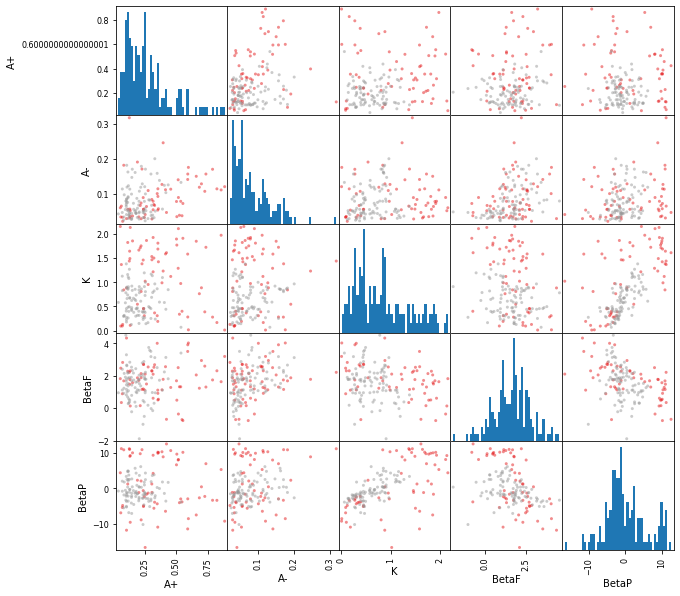

In [3]:
pd.plotting.scatter_matrix(df_orl[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=50), c=df_orl["subjID_label"], cmap="Set1")
plt.show()

### Young Group

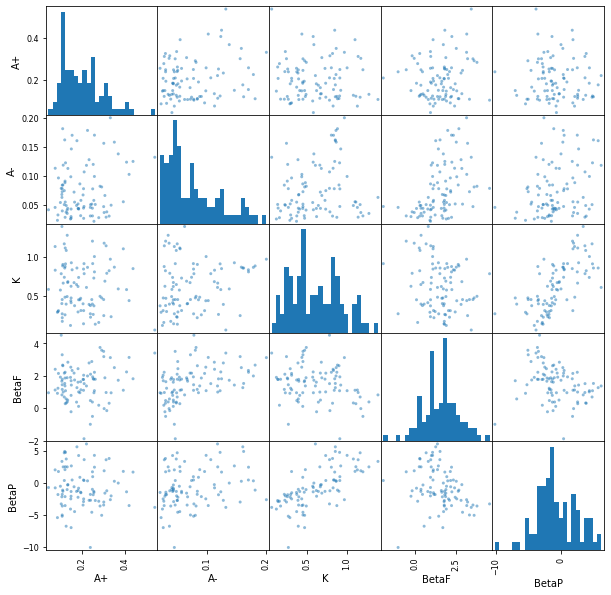

In [4]:
df_orl_young = df_orl[df_orl["subjID"] == "young"]
pd.plotting.scatter_matrix(df_orl_young[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=25), diagonal="hist")
plt.show()

### Old Group

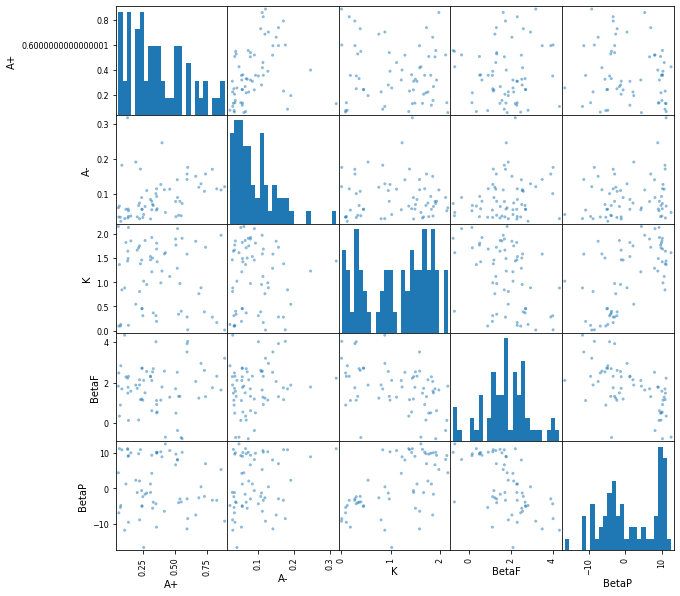

In [5]:
df_orl_old = df_orl[df_orl["subjID"] == "old"]
pd.plotting.scatter_matrix(df_orl_old[["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=25), diagonal="hist")
plt.show()

The parameter distributions for the two groups are not the same. The A+ parameter for the old group is much more varied. The K parameter is skewed much more to the right for the old group, and the BetaP seems to actually have two distributions; One similar to the young group, and another concentrated around the value 10.

### Splitting up the old group

We can split up the old group futher based on the two distributions we see for BetaP. **BetaP=7** is chosen here as the value to split them.  
The other parameters do not seem to have any difference between these groups, with the exception of **K**, which is slightly skewed left or right depending on the group.
We are dealing with less data as we drill down further, so it would be difficult to come to any solid conclusions by going deeper.

In [6]:
beta_p_split = 7

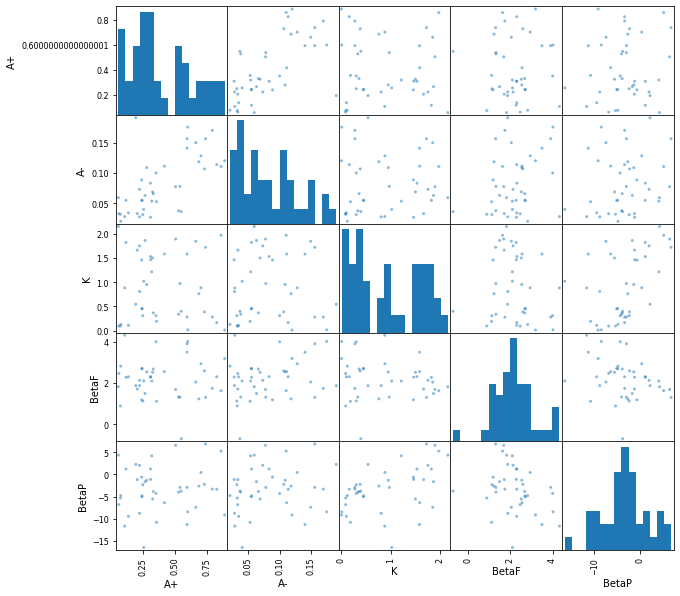

In [7]:
_df = df_orl_old[df_orl_old["BetaP"] <= beta_p_split]
pd.plotting.scatter_matrix(_df[ ["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=15), diagonal="hist")
plt.show()

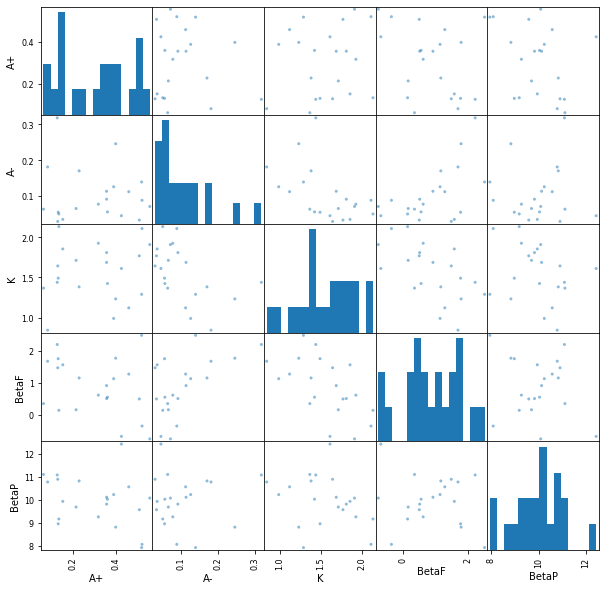

In [8]:
_df = df_orl_old[df_orl_old["BetaP"] > beta_p_split]
pd.plotting.scatter_matrix(_df[ ["A+", "A-", "K", "BetaF", "BetaP"]], figsize=(10,10), hist_kwds=dict(bins=15), diagonal="hist")
plt.show()